# Neural Networks

# I. Overview

The main objective of the Neural Networks assignment is to apply nonlinear regression and nonlinear logistic regression models on the dataset to predict the outcomes and determine the best performing parameters for the model.

In the first part of the assignment, the data for both the regression models will be preprocessed and analyzed to understand the relationships among different columns and find observations that can be used for the prediction model.

In the second part of the assignment, the K-fold cross-validation technique will be implemented from scratch to find good neural network parameters for nonlinear regression and nonlinear logistic regression neural network models. The non-linear logistic regression algorithm will also be implemented for applying the classification data.

In the third part of the assignment, the nonlinear regression neural network model will be applied to the house sales in the King county dataset to predict the house prices. And the nonlinear classification neural network model will be applied to the bank marketing dataset to predict whether the client subscribed to the term deposit that was marketed by the bank. In both parts, the K-Fold cross-validation technique will be applied to find good neural network parameters and then the best performing parameters are applied to the test data to predict the outcomes.

In the last part of the assignment, the prediction results from both the models will be analyzed and discussed.

# II. Data
## Regression Dataset
### House Sales in King County, Washington State
<br>
This dataset contains the record of houses sold between May 2014 to May 2015 in King County, Washington.<br>The dataset contains detailed information for each house like:

- ID
- Date sold
- Price
- Number of bedrooms
- Number of bathrooms
- Living room size (sqft)
- Lot Size (sqft)
- Number of floors
- Is it a waterfront property? (0 or 1)
- View rating (0-4)
- Condition rating (1-5)
- Grade rating (1-13)
- Above size (sqft)
- Basement size (sqft)
- Year built
- Year renovated
- Zipcode
- Latitude
- Longitude

The dataset contains a total of 13 columns and 21613 records. With the help of all the details provided from the dataset, I will try to gain insights from the data through a cycle of preprocessing, visualization, and finally applying regression analysis to predict the house selling price based on the provided house features.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
df = pd.read_csv('house_sales/data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Columns in dataset

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Number of rows and columns in the dataset

In [4]:
rows, columns = df.shape
print(f"ROWS:     {rows}")
print(f"COLUMNS:  {columns}")

ROWS:     21613
COLUMNS:  21


There are 21,613 rows and 21 columns.

## Preprocessing Data

### Check for missing values

In [5]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
np.any(df.isnull())

False

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

From the above validation, it can be seen that the dataset does not contain any missing values.

### Checking for duplicates

In [9]:
df.duplicated().sum()

0

In [10]:
df.duplicated().any()

False

The dataset does not contain any missing values.

In [11]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Columns Check

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Since the dataset does not contain metadata, Let's observe some column values which are categorized:

#### The view column is categorized from 0 to 4:

In [13]:
set(df.view)

{0, 1, 2, 3, 4}

#### The condition column is categorized from 1 to 5:

In [14]:
set(df.condition)

{1, 2, 3, 4, 5}

#### The grade column is categorized from 1 to 13:

In [15]:
set(df.grade)

{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

#### Column Datatypes:

In [16]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Timestamp column to Date conversion

In [17]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

##### Currently the date column is in timestamp format: 20141013T000000 <br>So converting it to more readable time format: 2014-10-13

In [18]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.date())

In [19]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Spliting Month and Year

In [20]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [21]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


### Removing Non-descriptive columns
* Since id, lat, and long columns don't give much information, I'm removing it from the data frame.
* The column sqft_living15, sqft_lot15 are duplicated in the dataset so removing it.
* The date is now split into month and year so removing the date column.

In [22]:
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df.drop('sqft_living15', axis=1, inplace=True)
df.drop('sqft_lot15', axis=1, inplace=True)

In [23]:
df.head(4)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,2014,12


In [24]:
df.shape

(21613, 17)

#### Again, checking the column datatypes

In [25]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
year               int64
month              int64
dtype: object

### Sampling the dataset to work with 10,000 rows

In [26]:
df = df.sample(10000)

In [27]:
newdf = df.copy()

In [28]:
df.shape

(10000, 17)

## Dataset Summary

In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.409267e+05,3.374100,2.116550,2083.849900,1.553041e+04,1.494500,0.008800,0.232600,3.407100,7.657300,1793.463800,290.386100,1970.88890,82.611100,98077.580900,2014.314800,6.613400
std,3.636296e+05,0.952281,0.772067,922.488085,4.355278e+04,0.538237,0.093399,0.768086,0.653921,1.176773,832.986587,442.908552,29.41175,397.550684,53.350236,0.464459,3.120723
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.00000,0.000000,98001.000000,2014.000000,1.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.00000,0.000000,98033.000000,2014.000000,4.000000
50%,4.520000e+05,3.000000,2.250000,1920.000000,7.609000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.00000,0.000000,98065.000000,2014.000000,6.000000
75%,6.482500e+05,4.000000,2.500000,2540.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1996.00000,0.000000,98117.000000,2015.000000,9.000000
max,7.062500e+06,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.00000,2015.000000,98199.000000,2015.000000,12.000000


In [30]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'year',
       'month'],
      dtype='object')

In [31]:
set(df.year)

{2014, 2015}

##### The dataset contains sample from 2014, 2015. So splitting the data accordingly to see the differences:

In [32]:
df_year_2014 = df[df.year == 2014]

In [33]:
df_year_2014.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
21367,553000.0,3,2.75,3160,9072,2.0,0,0,3,9,3160,0,2005,0,98056,2014,10
986,283000.0,4,2.75,2130,8560,1.0,0,0,3,7,1560,570,1992,0,98022,2014,10
14190,824000.0,2,1.00,1210,8400,1.0,0,0,3,8,780,430,2000,0,98199,2014,11
5904,416500.0,4,2.00,2280,39848,2.0,0,0,4,8,2280,0,1991,0,98070,2014,11
19082,550000.0,3,1.75,1410,5000,1.0,0,0,4,7,810,600,1923,0,98107,2014,7


In [34]:
df_year_2014.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
count,6.852000e+03,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.000000,6852.0,6852.000000
mean,5.413906e+05,3.382516,2.133830,2103.302685,15184.285610,1.505546,0.009048,0.232195,3.427320,7.687099,1808.701255,294.601430,1971.009194,87.682720,98077.603182,2014.0,8.255254
std,3.660193e+05,0.980054,0.772136,929.584985,39197.678272,0.539938,0.094699,0.767876,0.667314,1.178007,836.528491,446.529451,29.429218,409.100787,53.192144,0.0,2.232657
min,7.800000e+04,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,2014.0,5.000000
25%,3.223000e+05,3.000000,1.750000,1440.000000,5001.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1210.000000,0.000000,1951.000000,0.000000,98033.000000,2014.0,6.000000
50%,4.550000e+05,3.000000,2.250000,1940.000000,7632.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1590.000000,0.000000,1975.000000,0.000000,98065.000000,2014.0,8.000000
75%,6.500000e+05,4.000000,2.500000,2570.000000,10840.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2250.000000,570.000000,1996.000000,0.000000,98117.000000,2014.0,10.000000
max,7.062500e+06,33.000000,8.000000,13540.000000,982998.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,2014.0,12.000000


#### The data summary shows that the mean price of a house sold in 2014 was $538,810.40 with an average of 3 bedrooms, 2 bathrooms, 2,100 sqft living room, 15,204 sqft lot, 1 floor, 1,802 sqft above space, and 298 sqft basement.

In [35]:
df_year_2015 = df[df.year == 2015]

In [36]:
df_year_2015.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
15937,279000.0,3,2.25,2070,7800,1.0,0,0,3,7,1170,900,1964,0,98003,2015,3
17564,600000.0,2,1.75,1560,3200,1.0,0,0,5,7,880,680,1946,0,98199,2015,4
3963,502000.0,4,1.75,1920,3844,1.0,0,0,3,7,1170,750,1967,0,98133,2015,5
14831,295000.0,3,2.50,2030,4867,2.0,0,0,3,7,2030,0,2003,0,98042,2015,5
5913,415000.0,3,2.75,2080,9600,1.0,0,0,3,7,2080,0,1988,0,98028,2015,3


In [37]:
df_year_2015.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
count,3.148000e+03,3148.000000,3148.000000,3148.000000,3.148000e+03,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.0,3148.000000
mean,5.399171e+05,3.355781,2.078939,2041.508577,1.628378e+04,1.470457,0.008259,0.233482,3.363088,7.592440,1760.297649,281.210928,1970.627065,71.572109,98077.532402,2015.0,3.039708
std,3.584286e+05,0.888711,0.770702,905.551238,5.178008e+04,0.533812,0.090519,0.768665,0.621608,1.171652,824.383487,434.852008,29.376662,370.993280,53.701181,0.0,1.202956
min,7.500000e+04,0.000000,0.000000,470.000000,6.000000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,470.000000,0.000000,1900.000000,0.000000,98001.000000,2015.0,1.000000
25%,3.225000e+05,3.000000,1.500000,1400.000000,5.036750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98032.000000,2015.0,2.000000
50%,4.500000e+05,3.000000,2.250000,1870.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,0.000000,1973.000000,0.000000,98065.000000,2015.0,3.000000
75%,6.400000e+05,4.000000,2.500000,2470.000000,1.045850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2165.750000,530.000000,1996.000000,0.000000,98118.000000,2015.0,4.000000
max,4.208000e+06,9.000000,6.000000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2250.000000,2015.000000,2015.000000,98199.000000,2015.0,5.000000


#### The data summary shows that the mean price of a house sold in 2015 was $542,538.10 with an average of 3 bedrooms, 2 bathrooms, 2,041 sqft living room, 15,176 sqft lot, 1 floor, 1,760 sqft above space, and 281 sqft basement.

### The data suggests that the house prices rose in 2015 when compared to the year 2014.

## Removing outliers for better prediction model

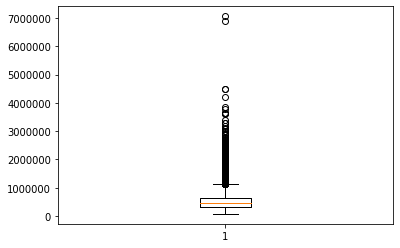

In [38]:
plt.boxplot(df["price"])
plt.show()

### Normalizing and Standardizing data

In [39]:
# Standardize Price
from sklearn.preprocessing import StandardScaler
Tscaled = StandardScaler().fit_transform(df['price'][:,np.newaxis])
df['price'] = Tscaled

In [40]:
# Normalizing sqft_living
df['sqft_living'] = np.log(df['sqft_living'])

## Data Visualization

#### Creating a scatter plot to visualize the relationship between the house price and other variables.

In [41]:
Target = df.iloc[:, :1]
Features = df.iloc[:, 1:]

<Figure size 432x288 with 0 Axes>

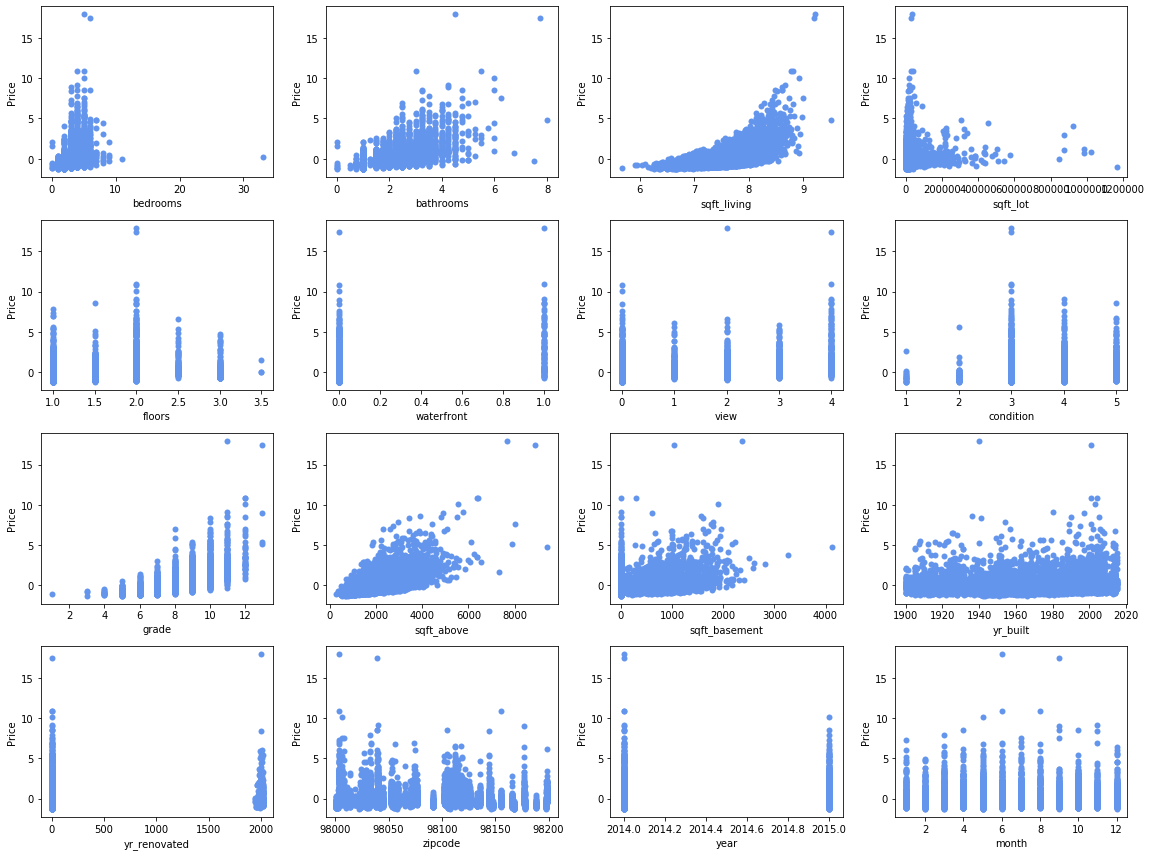

In [42]:
plt.clf() # Clear previous plt figure
fig = plt.figure(figsize=(16,12))
for i in range(16):
    plt.subplot(4, 4, i+1) # Selects which subplot to plot to
    plt.scatter(Features.iloc[:, i], Target, linewidth=0, color='cornflowerblue') # Plots a given column
    plt.xlabel(Features.columns.values[i]) # Sets X label
    plt.ylabel("Price") # Sets Y label
fig.tight_layout()

#### Observations
- Looking at the relationship between house price and bedrooms, it can be seen that the houses with 5 to 7 bedrooms have a higher cost. 
- Most houses have an average of 2 to 4 bathrooms. As the number of bathrooms increases, the cost of the house increases.
- There seems to be a linear relationship between the living room size and house price. The cost of the houses with a larger living room area is higher.
- Houses with 2 floors are highly expensive.
- The house with condition rating 3 is sold at the highest price.
- There is a linear relationship with house grade and house cost. The houses with a grade higher than 12 are very expensive.
- The houses with more space above and in the basement are sold at a higher cost.
- The houses built after the year 2000 are sold at a higher cost where compared to the older houses.

## Box and Whisker plots

### In order to better understand the data, I have also plotted it without including the outliers

### Observation
- Most of the houses sold falls under the 75th percentile. The median house sold is observed to be $450,000.
- The bathrooms in most of the houses fall under the second quartile. The median seems to be 2.4 bathrooms.
- Most of the houses with a living room and the lot falls under the 75th percentile.
- Most of the houses have a median of 1.5 floors.
- The median house built seems to be around the year 1975.

## Correlation HeatMap

In [43]:
corr = newdf.corr()

In [44]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,year,month
price,1.000000,0.305529,0.523460,0.703143,0.102394,0.258517,0.288351,0.402027,0.032040,0.664580,0.612203,0.313122,0.057570,0.122596,-0.059850,-0.001882,-0.007638
bedrooms,0.305529,1.000000,0.508600,0.560870,0.027010,0.173575,-0.004409,0.076001,0.032930,0.348596,0.463940,0.295637,0.151558,0.003545,-0.145648,-0.013039,0.001826
bathrooms,0.523460,0.508600,1.000000,0.752298,0.106377,0.500835,0.067256,0.190808,-0.121920,0.659763,0.684578,0.279383,0.507818,0.034772,-0.206151,-0.033021,0.009083
sqft_living,0.703143,0.560870,0.752298,1.000000,0.194165,0.356782,0.109150,0.293363,-0.057572,0.761694,0.877569,0.432336,0.319938,0.050844,-0.205447,-0.031112,0.013860
sqft_lot,0.102394,0.027010,0.106377,0.194165,1.000000,0.002749,0.028618,0.076779,-0.018596,0.130748,0.202456,0.023644,0.063132,0.010267,-0.131522,0.011725,-0.004996
floors,0.258517,0.173575,0.500835,0.356782,0.002749,1.000000,0.023841,0.020513,-0.266420,0.468113,0.526524,-0.247140,0.491019,0.002212,-0.056076,-0.030279,0.017549
waterfront,0.288351,-0.004409,0.067256,0.109150,0.028618,0.023841,1.000000,0.430119,0.033036,0.086587,0.074372,0.087464,-0.032665,0.109120,0.028940,-0.003925,0.012359
view,0.402027,0.076001,0.190808,0.293363,0.076779,0.020513,0.430119,1.000000,0.049597,0.256826,0.170055,0.291189,-0.047629,0.107560,0.078253,0.000778,-0.008293
condition,0.032040,0.032930,-0.121920,-0.057572,-0.018596,-0.266420,0.033036,0.049597,1.000000,-0.140865,-0.157740,0.176754,-0.344171,-0.069178,0.001173,-0.045623,0.017439
grade,0.664580,0.348596,0.659763,0.761694,0.130748,0.468113,0.086587,0.256826,-0.140865,1.000000,0.756102,0.164437,0.450675,0.011868,-0.192453,-0.037361,0.013511


### Using seaborn library to see the colored heatmap for better visualization

<Figure size 432x288 with 0 Axes>

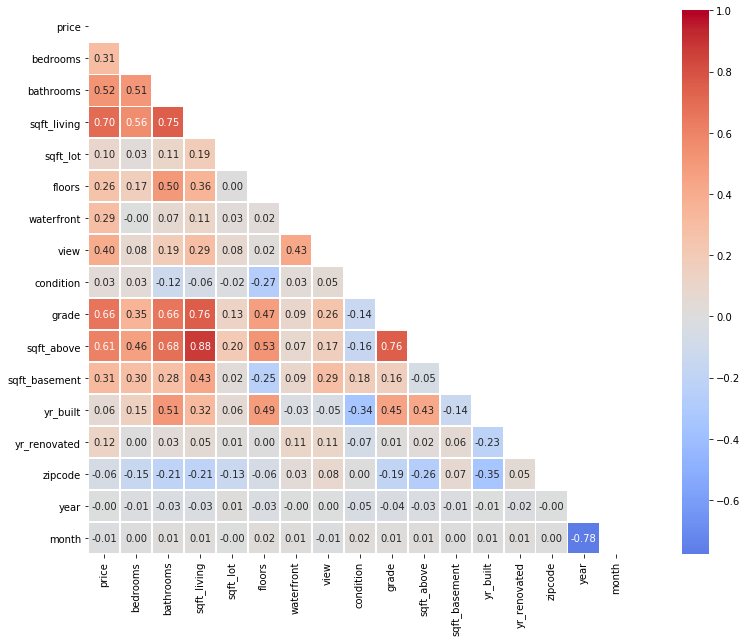

In [45]:
plt.clf() # Clear previous plt figure
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, center=0, fmt=".2f", square=True, linewidths=.5)
plt.show()

- From the above correlation matrix, it can be seen that the price of the house has the highest correlation with the size of the living room, and house grade level. The other two columns which have a high correlation with house cost are sqft above, and bathroom.
- The other observation from the correlation matrix shows that the sqft above and sqft living has the highest correlation.
- There is a correlation among Sqft above and grade. sqft living and grade also has a visible correlation.

## Applying Regression Plot using Seaborn

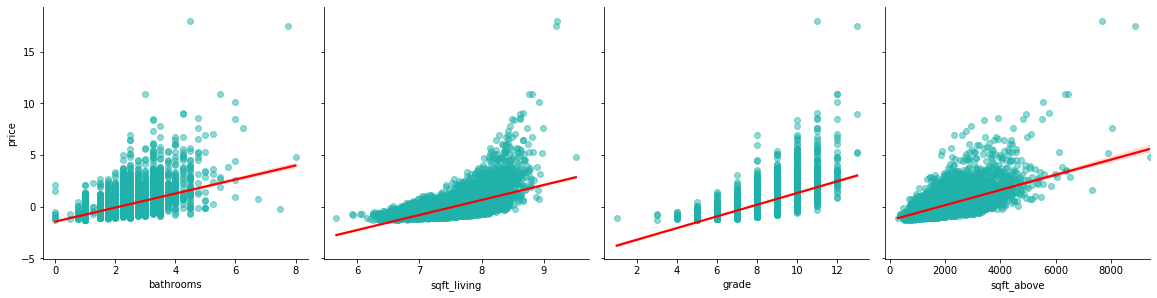

In [46]:
# list(set(F.columns))
explore_features = ['bathrooms','sqft_living','grade','sqft_above']
g = sns.PairGrid(df, y_vars=["price"], x_vars=explore_features, height=4)
g.map(sns.regplot, color=".3", scatter_kws={"color": "lightseagreen", 'alpha': 0.5}, line_kws={'color': 'red'})
# g.map(sns.scatterplot, edgecolor="white")

The above visualizations clearly shows that the house price has a linear relationship with bathrooms, sqft_living, and sqft_above.

### Selecting Feature Columns with High Correlation 

In [47]:
drop_cols = ['sqft_lot', 'bedrooms', 'floors', 'waterfront', 'view', 'condition',
             'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'year', 'month', 'sqft_above']
df.drop(drop_cols, inplace=True, axis=1)

## Classification Dataset
### Bank Marketing Campaign

This dataset is provided by Laureano and Cortez's research which was focused on targeting the bank telemarketing phone calls to sell longterm deposits to the clients. In this campaign, the human agents executed phone calls to the list of clients for selling the deposit or if meanwhile the client called the call center for some other purpose and was asked to subscribe to the deposit. This resulted in a binary result, whether it was successful or unsuccessful. This study contains the real data collected from a Portuguese retail bank, from May 2008 to June 2013, totaling 52,944 phone contacts.

The dataset provides several input variables to create a classification model to determine whether the client has subscribed to the term deposit or not. The variables provided in the dataset contains information about the client as well as the campaign outcomes to better classify the target outcome.


#### Below is the information provided in the dataset:

- age
- job type
- marital status
- education
- default - Has credit in default?
- balance: Average yearly balance (€uros)
- housing - Has a housing loan?
- loan - Has a personal loan?
- contact - Communication type
- day - Last contact day of the month
- month - Last contact month of the year
- duration - Last contact duration (in seconds)
- campaign - Number of contacts performed during this campaign for that particular client
- pdays - Number of days that passed by after the client was last contacted from a previous campaign
    - -1 means that the client was not previously contacted
- previous - Number of contacts performed before this campaign for that particular client
- poutcome - Outcome of the previous marketing campaign
- y - Binary evaluation of whether the client subscribed to a term deposit?

The dataset contains a total of 17 columns and 45,211 records. With the help of all the details provided from the dataset, I will try to gain insights from the data through a cycle of preprocessing, visualization, and finally applying classification algorithm to predict whether the client will subscribe to the term deposit or not.

### Importing the libraries

In [48]:
data = pd.read_csv('marketing_data/bank-full.csv', delimiter=";")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [49]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [50]:
data.shape

(45211, 17)

In [51]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Check for Null values

In [52]:
data.isnull().any(axis=1).sum()

0

#### The dataset does not have any null values.

### Check for duplicates

In [53]:
data.duplicated().sum()

0

In [54]:
data.duplicated().any()

False

There are no duplicates observed in the dataset

In [55]:
def get_sorted(mydict):
    ''' Method to print out sorted dictionary '''
    for key in sorted(mydict):
        print(key, mydict[key])

### Sampling 10,000 rows from the dataset

In [56]:
data = data.sample(10000)

### Converting the job column into categorical column

In [57]:
data['job'].value_counts()

blue-collar      2193
management       2030
technician       1629
admin.           1216
services          900
retired           482
self-employed     352
entrepreneur      342
unemployed        293
housemaid         276
student           222
unknown            65
Name: job, dtype: int64

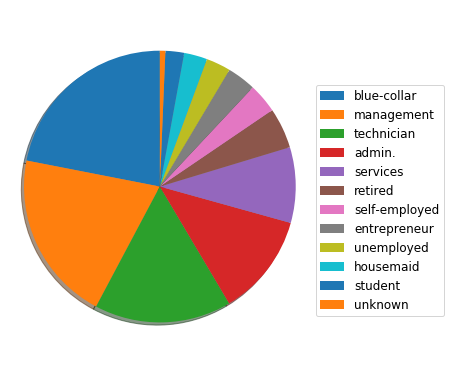

In [58]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data['job'].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data['job'].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The highest number of customers worked either a blue-collar job, management, technician, or admin.

In [59]:
data['job'] = data['job'].astype('category')
job_dic = dict(zip(data['job'].cat.codes, data['job']))
get_sorted(job_dic)

0 admin.
1 blue-collar
2 entrepreneur
3 housemaid
4 management
5 retired
6 self-employed
7 services
8 student
9 technician
10 unemployed
11 unknown


In [60]:
data['job'] = data['job'].cat.codes

In [61]:
data['job'].head(5)

38651    1
9096     9
20655    5
30197    0
26310    4
Name: job, dtype: int8

### Converting the marital column into categorical column

In [62]:
data["marital"].value_counts()

married     5985
single      2901
divorced    1114
Name: marital, dtype: int64

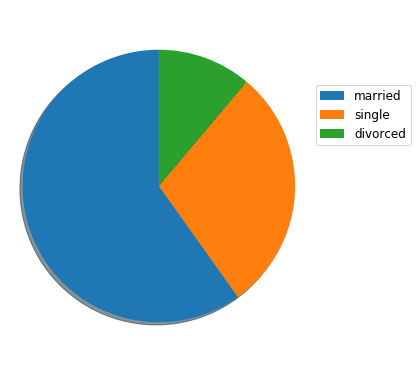

In [63]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["marital"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["marital"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

Married customers were approached higher than single or divorced customers.

In [64]:
data["marital"] = data["marital"].astype('category')
marital_dic = dict(zip(data["marital"].cat.codes, data["marital"]))
get_sorted(marital_dic)

0 divorced
1 married
2 single


In [65]:
data["marital"] = data["marital"].cat.codes

In [66]:
data["marital"].head(5)

38651    2
9096     1
20655    1
30197    0
26310    1
Name: marital, dtype: int8

### Converting the education column into categorical column

In [67]:
data["education"].value_counts()

secondary    5179
tertiary     2896
primary      1520
unknown       405
Name: education, dtype: int64

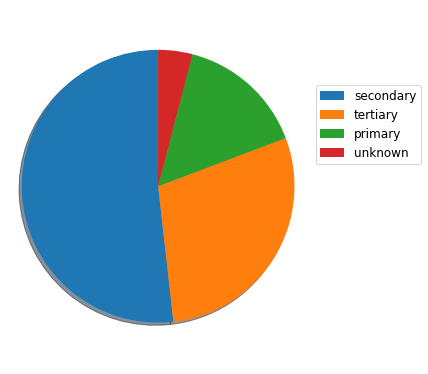

In [68]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["education"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["education"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

It looks like half of the clients approached had primary education.

In [69]:
data["education"] = data["education"].astype('category')
education_dic = dict(zip(data["education"].cat.codes, data["education"]))
get_sorted(education_dic)

0 primary
1 secondary
2 tertiary
3 unknown


In [70]:
data["education"] = data["education"].cat.codes

In [71]:
data["education"].head(5)

38651    1
9096     1
20655    1
30197    1
26310    2
Name: education, dtype: int8

### Converting the default column into categorical column

In [72]:
data["default"].value_counts()

no     9807
yes     193
Name: default, dtype: int64

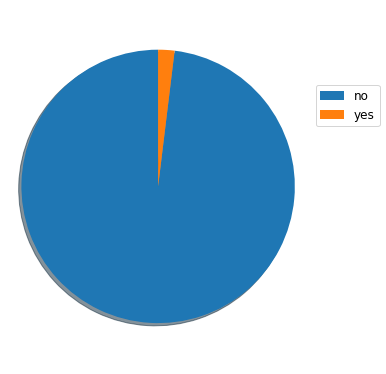

In [73]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["default"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["default"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The highest number of approached clients had a credit default.

In [74]:
data["default"] = data["default"].astype('category')
default_dic = dict(zip(data["default"].cat.codes, data["default"]))
get_sorted(default_dic)

0 no
1 yes


In [75]:
data["default"] = data["default"].cat.codes

In [76]:
data["default"].head(10)

38651    0
9096     0
20655    0
30197    0
26310    0
6272     0
16679    0
12781    0
5303     0
33864    0
Name: default, dtype: int8

### Converting the housing column into categorical column

In [77]:
data["housing"].value_counts()

yes    5524
no     4476
Name: housing, dtype: int64

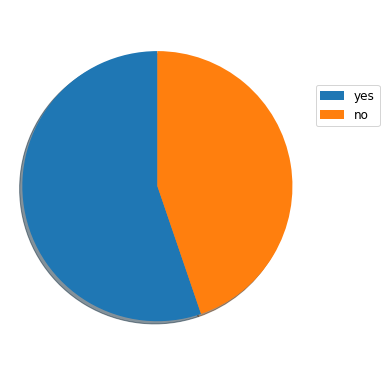

In [78]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["housing"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["housing"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

More than half of the clients had a housing loan.

In [79]:
data["housing"] = data["housing"].astype('category')
housing_dic = dict(zip(data["housing"].cat.codes, data["housing"]))
get_sorted(housing_dic)

0 no
1 yes


In [80]:
data["housing"] = data["housing"].cat.codes

In [81]:
data["housing"].head(5)

38651    0
9096     0
20655    1
30197    0
26310    1
Name: housing, dtype: int8

### Converting the loan column into categorical column

In [82]:
data["loan"].value_counts()

no     8413
yes    1587
Name: loan, dtype: int64

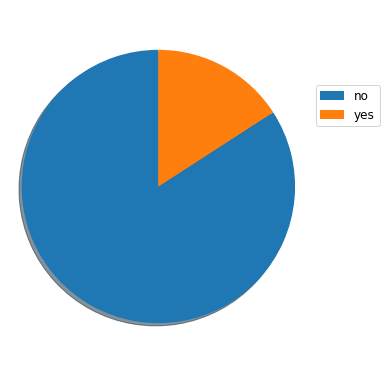

In [83]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["loan"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["loan"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

Almost 70% of the approached customers had a personal loan.

In [84]:
data["loan"] = data["loan"].astype('category')
loan_dic = dict(zip(data["loan"].cat.codes, data["loan"]))
get_sorted(loan_dic)

0 no
1 yes


In [85]:
data["loan"] = data["loan"].cat.codes

In [86]:
data["loan"].head(5)

38651    0
9096     0
20655    1
30197    0
26310    0
Name: loan, dtype: int8

### Converting the contact column into categorical column

In [87]:
data["contact"].value_counts()

cellular     6500
unknown      2867
telephone     633
Name: contact, dtype: int64

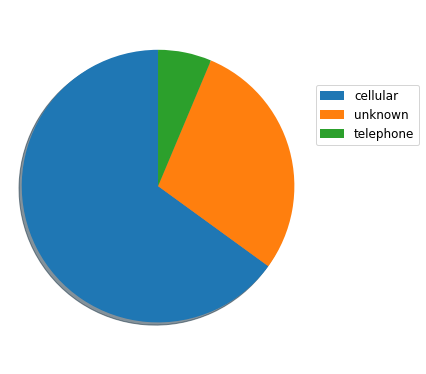

In [88]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["contact"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["contact"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The clients were approached higher through their cell phones.

In [89]:
data["contact"] = data["contact"].astype('category')
contact_dic = dict(zip(data["contact"].cat.codes, data["contact"]))
get_sorted(contact_dic)

0 cellular
1 telephone
2 unknown


In [90]:
data["contact"] = data["contact"].cat.codes

In [91]:
data["contact"].head(-10)

38651    0
9096     2
20655    0
30197    0
26310    0
        ..
11392    2
13716    0
8564     2
32251    0
22030    0
Name: contact, Length: 9990, dtype: int8

### Converting the month column into categorical column

In [92]:
data["month"].value_counts()

may    3034
jul    1526
aug    1365
jun    1196
nov     859
apr     650
feb     565
jan     325
oct     172
sep     131
mar     125
dec      52
Name: month, dtype: int64

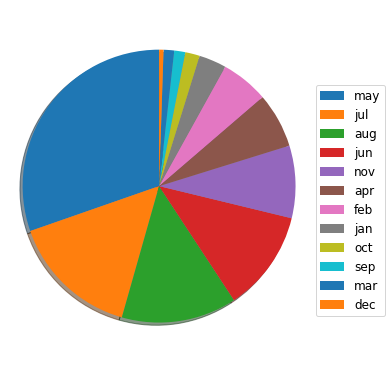

In [93]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["month"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["month"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

It seems that the marketing campaign was highly active in May, June, July, and August (Summer season).

In [94]:
months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
          'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

#### Changing the months from string to integers

In [95]:
data['month'] = data['month'].apply(lambda x: months[x])

In [96]:
data['month'].value_counts()

5     3034
7     1526
8     1365
6     1196
11     859
4      650
2      565
1      325
10     172
9      131
3      125
12      52
Name: month, dtype: int64

### Converting the poutcome column into categorical column

In [97]:
data["poutcome"].value_counts()

unknown    8190
failure    1054
other       413
success     343
Name: poutcome, dtype: int64

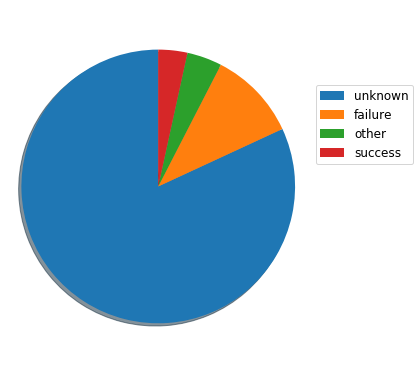

In [98]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["poutcome"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["poutcome"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The previous outcome for the marketing for most of the approached customers was unknown. It seems that they approached more to the clients who did not subscribe to last marketing campaign.

In [99]:
data["poutcome"] = data["poutcome"].astype('category')
poutcome_dic = dict(zip(data["poutcome"].cat.codes, data["poutcome"]))
get_sorted(poutcome_dic)

0 failure
1 other
2 success
3 unknown


In [100]:
data["poutcome"] = data["poutcome"].cat.codes

In [101]:
data["poutcome"].head(5)

38651    3
9096     3
20655    3
30197    1
26310    0
Name: poutcome, dtype: int8

### Converting the target: y column into categorical column

In [102]:
data["y"].value_counts()

no     8810
yes    1190
Name: y, dtype: int64

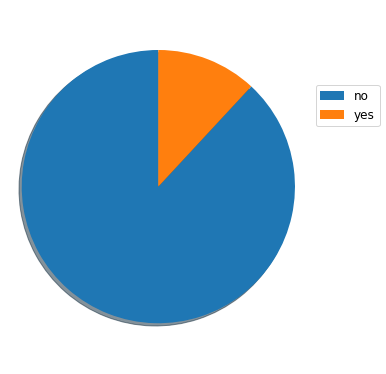

In [103]:
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3, 0, 1, 1)
ax1.pie(data["y"].value_counts().tolist(), shadow=True, startangle=90)
plt.legend(data["y"].value_counts().keys().tolist(),
           bbox_to_anchor=(1.0, 0.8),
           fontsize=12,
           loc="upper left")
ax1.axis('equal')
plt.show()

The current marketing campaign seems to have a very less success rate based on the number of customers who chose to subscribe.

In [104]:
data["y"] = data["y"].astype('category')
y_dic = dict(zip(data["y"].cat.codes, data["y"]))
get_sorted(y_dic)

0 no
1 yes


In [105]:
data["y"] = data["y"].cat.codes

In [106]:
data["y"].head(5)

38651    0
9096     0
20655    0
30197    0
26310    0
Name: y, dtype: int8

### Removing the duration column

In the dataset, the author has noted that the duration column highly affects the output target. The author has recommended that the input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. It will highly affect the model in the situation where the duration of the call performed is not known because at the end of the call the result is already known. To achieve the most accurate predictions, I will remove it.

In [107]:
data.shape

(10000, 17)

In [108]:
data.drop('duration', axis=1, inplace=True)

In [109]:
data.shape

(10000, 16)

### Checking the new transformed columns

In [110]:
data.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month        int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
y             int8
dtype: object

#### Now, all the columns have integer datatypes to start observations

In [111]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
38651,29,1,2,1,0,7531,0,0,0,15,5,2,-1,0,3,0
9096,42,9,1,1,0,769,0,0,2,5,6,1,-1,0,3,0
20655,60,5,1,1,0,781,1,1,0,12,8,5,-1,0,3,0
30197,50,0,0,1,0,381,0,0,0,5,2,1,212,2,1,0
26310,45,4,1,2,0,96,1,0,0,20,11,1,127,1,0,0


In [112]:
data.shape

(10000, 16)

## Splitting the dataset into Features and Target

#### Creating a new target dataframe to store the column y

In [113]:
Target = data.iloc[:, -1]
Target

38651    0
9096     0
20655    0
30197    0
26310    0
        ..
31516    0
37517    0
3315     0
35612    0
14915    0
Name: y, Length: 10000, dtype: int8

#### Storing all the other columns into feature dataframe

In [114]:
Features = data.iloc[:, :-1]
Features

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
38651,29,1,2,1,0,7531,0,0,0,15,5,2,-1,0,3
9096,42,9,1,1,0,769,0,0,2,5,6,1,-1,0,3
20655,60,5,1,1,0,781,1,1,0,12,8,5,-1,0,3
30197,50,0,0,1,0,381,0,0,0,5,2,1,212,2,1
26310,45,4,1,2,0,96,1,0,0,20,11,1,127,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31516,36,9,1,1,0,0,0,0,0,2,4,1,-1,0,3
37517,44,7,1,1,0,4837,1,0,0,13,5,3,-1,0,3
3315,56,5,1,1,0,344,1,0,2,15,5,1,-1,0,3
35612,32,9,2,2,0,1849,1,0,0,7,5,1,-1,0,3


## Visualization

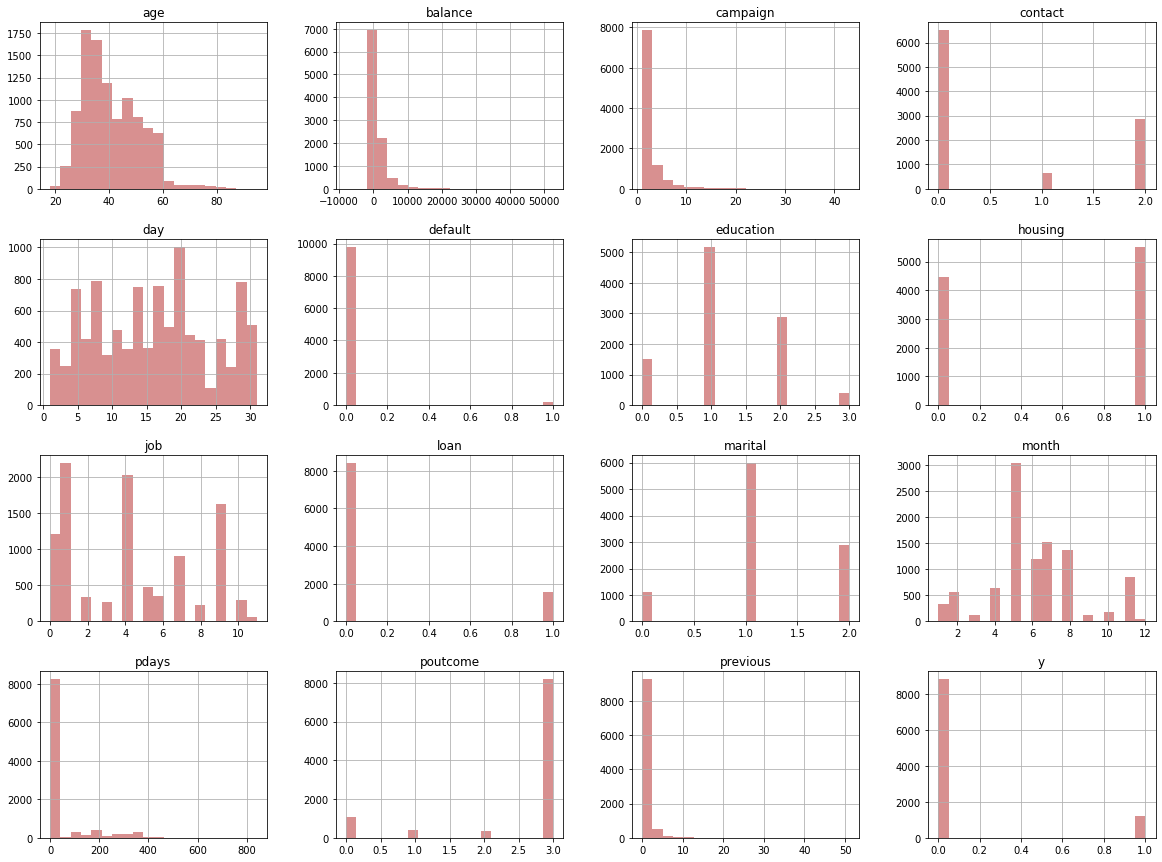

In [115]:
data.hist(color='firebrick', alpha=0.5, bins=20, figsize=(20, 15))
plt.show()

- From the above histogram plots, it can be seen that the people aged from 30 to 40 are highly targeted for the marketing campaign. 
- Each client was approached at least 1 to 3 times during the marketing campaign.
- Most clients are contacted on their cell phones.
- Most of the clients worked a blue-collar, management, or technician job.
- Most of the clients did not own a loan.
- Most of the clients have attained either secondary or tertiary education.
- Most of the clients own house loans.
- Most clients were married.
- The marketing campaign was highly in action during May month.
- The outcome of the previous campaign was either unknown or failure. There was a very low success rate.
- The outcomes of the campaign has very few success compared to its failure rate.

In [116]:
# Check the original value for the categorical column
# get_sorted(y_dic)

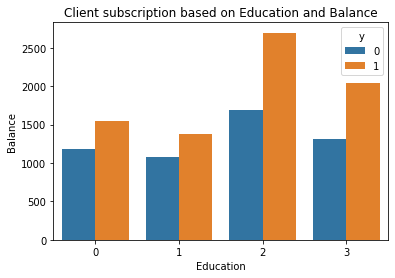

In [117]:
sns.barplot(x='education', y='balance', hue='y', data=data, ci=None)
plt.title('Client subscription based on Education and Balance')
plt.xlabel('Education')
plt.ylabel('Balance')
plt.show()

From the above data, it can be observed that the people who have attained tertiary education have a high yearly average balance are more likely to subscribe to the term deposit. The people who have attained secondary education, and have high yearly average balance are least likely to subscribe when compared to the people who have tertiary education.

<Figure size 432x288 with 0 Axes>

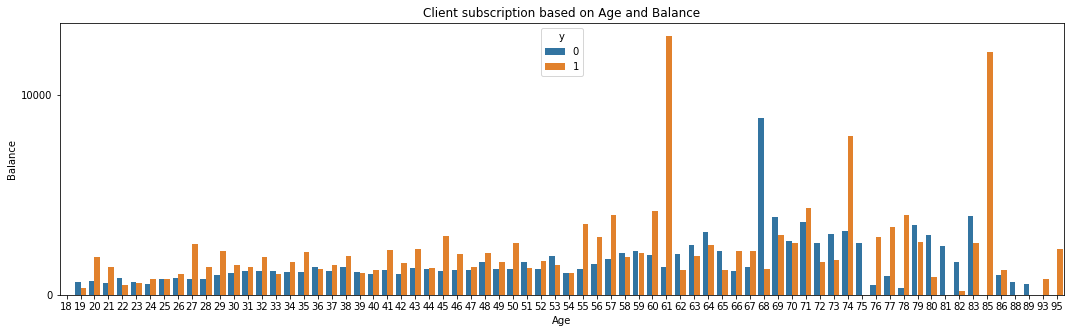

In [118]:
import matplotlib.ticker as ticker

plt.clf()
plt.figure(figsize=(18,5))
bar = sns.barplot(x='age', y='balance', hue='y',data=data, ci=None)
bar.yaxis.set_major_locator(ticker.MultipleLocator(10000))
bar.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Client subscription based on Age and Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

From the above graph, it can be observed that the people with age around 60 to 85 have high yearly average balance compared to younger people. They are also more likely to accept the subscription offer from the marketing campaign.

In [119]:
data_corr = data.corr()

<Figure size 432x288 with 0 Axes>

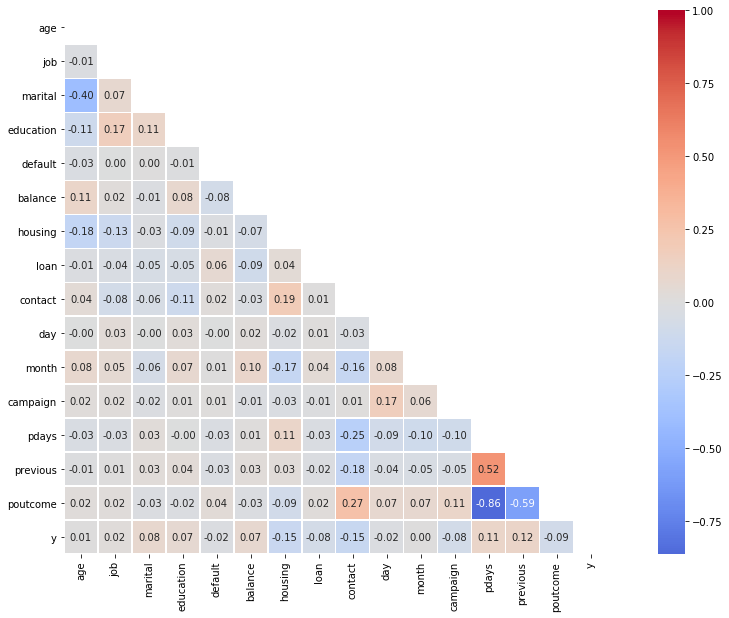

In [120]:
plt.clf()  # Clear previous plt figure
mask = np.triu(np.ones_like(data_corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(data_corr,
            mask=mask,
            cmap='coolwarm',
            annot=True,
            center=0,
            fmt=".2f",
            square=True,
            linewidths=.5)
plt.show()

From the above correlation matrix, it can be observed that the previous, pdays, education, and balance columns correlate with the final decision of the marketing campaign.

### Keeping only the columns which were identified to have high correlation

In [121]:
drop_cols = ['job', 'marital', 'default', 'balance', 'housing', 'loan', 'contact',
             'day', 'month', 'campaign', 'pdays', 'poutcome']

# Columns with Correlation: 'previous', 'education', 'age'
data.drop(drop_cols, inplace=True, axis=1)

### Normalizing Data

In [122]:
data.iloc[:,:-1] = (data.iloc[:,:-1] - data.iloc[:,:-1].mean()) / data.iloc[:,:-1].std()

# III. Methods

## III.A 5-fold Cross-Validation

The k-fold cross-validation is a technique used to evaluate the skill of the model on the new data. It helps to tackle the often encountered problem of over fitting while training the machine learning models.

In the K-means cross-validation technique, the data is first split into k number of subsets and then for each subset, the group of test data is held out and the remaining data is used for training. For each subset, the model is fitted on the training set and then evaluated on the test data. At the end of each fold, the evaluation data is retained for each subset and the model is discarded. The evaluation metrics from the iterations are then summarized and the best performing model parameters are returned for the model.

Below is the pseudocode for the K-fold CV algorithm:
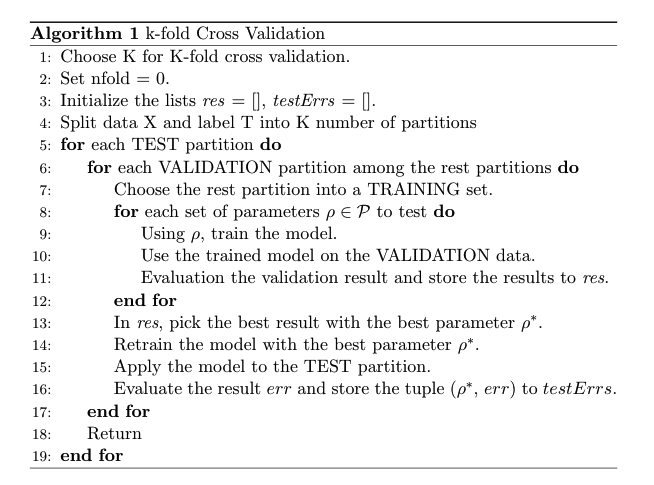

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\av}{\mathbf{a}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Xlm}{\mathbf{X1}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Vm}{\mathbf{V}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Gm}{\mathbf{G}}
 \newcommand{\Zlm}{\mathbf{Z1}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Phiv}{\boldsymbol\Phi}
$

## III.B Nonlinear Regression 

The nonlinear regression is a type of polynomial regression where the relationship between the independent variable and dependent variables outputs a non-linear model. The relationship in the nonlinear regression is represented by the polynomial of n degrees. The nonlinear model can be created by adding higher degree terms such as square, cubic, quartic, and so on. 

$$ f(\xv; \wv) = w_0 + w_1 \xv + w_2 \xv^2 + w_3 \xv^3 + \cdots $$

It is also called *polynomial regression* as the input features are transformed to nonlinear by extending the features to high dimensions with higher polynomial degree terms. Example, the input feature $(1, x)$ is extended to $(1, x, x^2, x^3)$ for cubic polynomial regression model. After input transformation, Least Squares or Least Mean Squares can be used to find the weights as the model is still linear with respect to the weight $\wv$.

## III.C Nonlinear Logistic Regression

In linear logistic regression, softmax function was used to generate the probabilistic output for the classes. 
$$g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}$$
But in order to handle multi-label classes, indicator target labels is used for training step to update the weights for the linear model. Below is the update rule for the batch samples in nonlinear logistic regression:
$$\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).$$
Below is the Error function for the nonlinear logistic regression: 
$$E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}. $$

In nonlinear logistic regression, the softmax activation function is used for the classification as compared to the polynomial function used in the nonlinear regression model. Below is the image of the neural network model:

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/nonlinearlogreg.png" width=500 />

# Implementation

In [123]:
from sklearn.metrics import (mean_squared_error, roc_curve, roc_auc_score, precision_recall_curve, 
                             average_precision_score, confusion_matrix)
from sklearn.model_selection import train_test_split
from nn import NeuralNet

Below is the function which splits the given dataset into N number of folds for the nonlinear regression model.

In [124]:
def split_data_nonlinear_reg(df, folds):
    df = df.sample(frac=1).reset_index(drop=True)
    X = df.iloc[:, 1:]
    T = df.iloc[:, :1]
    x_set = []
    y_set = []
    split_size = int(np.floor(X.shape[0] / folds))
    row_num = 0
    for k in range(folds):
        x_set.append(X.iloc[row_num:row_num + split_size, :].to_numpy())
        y_set.append(T.iloc[row_num:row_num + split_size, ].to_numpy())
        row_num += split_size
    return x_set, y_set

Below is the function to calculate the Root Mean Square Error (RMSE) by taking test data and predicted data

In [125]:
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2).mean())

Below is the function for the K-Fold Cross Validation technique where the dataset is first broken down into the K number of subsets and then for each partition, the data is again split into the test and train data. 

For the train data within the partition, the non-linear regression neural network model is fitted and applied on the test data to calculate the residual error. This process is applied for all the partitions and in the end, the residual error is evaluated to select the best value (Number of hidden layers) for the non-linear regression model.

In [126]:
def kFoldNonLinearReg(df, folds, numLayers):
    res = []
    res_arr = []
    testErrs = []
    train, test = train_test_split(df[:1000], test_size=0.30)
    trainArr_x, trainArr_y = split_data_nonlinear_reg(train, folds=5)
    testArr_x, testArr_y = split_data_nonlinear_reg(test, folds=5)

    for partition in range(folds):
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        parition_arr = []
        for p in range(len(numLayers)):
            num_features = Xtrain.shape[1]
            num_output = ytrain.shape[1]
            # print(f"Layer: {numLayers[p]} ---- Parition: {partition}")
            neuralnet = NeuralNet([num_features, numLayers[p], num_output])
            neuralnet.train(Xtrain, ytrain, wprecision=1e-20, fprecision=1e-2)
            pred = neuralnet.use(Xtest)
            rmse_score = mean_squared_error(ytest, pred)
            # print(rmse_score)
            parition_arr.append(rmse_score)
        print(parition_arr)
        res.append(parition_arr)

    for partition in range(folds):
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        min_value = min(res[partition])
        min_pos = np.where(res[partition] == min(res[partition]))[0][0]
        res_arr.append([min_pos, min_value])

        num_features = trainArr_x[partition].shape[1]
        num_output = trainArr_y[partition].shape[1]
        neuralnet = NeuralNet([num_features, numLayers[min_pos], num_output])
        neuralnet.train(trainArr_x[partition], trainArr_y[partition], wprecision=1e-20, fprecision=1e-2)
        pred = neuralnet.use(testArr_x[partition])
        rmse_score = mean_squared_error(ytest, pred)
        plt.clf()
        plt.subplots(figsize=(15,5))
        plt.title(f'Parition {partition} Best Number of Layers: {numLayers[min_pos]}')
        plt.plot(ytest, '.')
        plt.xticks(range(0, 101, 20), range(0, 11, 2))
        plt.plot(pred)
        plt.show()

    #print(res_arr)
    #testErrs = [res[1] for res in res_arr]
    #best_num_layer = testErrs.index(min(testErrs)) 
    testErrs = [res[0] for res in res_arr]
    best_num_layer = max(set(testErrs), key=testErrs.count)
    print(f"Best Layer Value: {numLayers[best_num_layer]}")
    return numLayers[best_num_layer]

Below is the implementation of the NonLinear Logistic Regression Class. The NeuralNetLogReg class inherits the NeuralNet class and contains functions like softmax, forward, _objectf, train, and use.
- init - Takes the number of hidden units for the neural network and initializes the inherited constructor from NeuralNet. 
- softmax  - Calculates the probability distributions of potential outcomes for all classes.
- forward  - Calculates the forward pass for the logistic regression.
- _objectf - Calculates the error function to be minimized
- train    - Fits the input training data into the model by inheriting the train function from the NeuralNet class.
- use      - Tests the input test data by first going through forward pass, which will calculate the probabilities for each label, and then using argmax function to calculate the class labels.

In [127]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression"""

    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        Y, Z = NeuralNet.forward(self, X)
        G = self.softmax(Y)
        return (G, Z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum( np.sum((T * np.log(Y)) , axis=1), axis=0)) + wpenalty

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both),
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and
    # feed that for training
    def train(self, X, T, **params):
        T1 = (T == np.unique(T)).astype(int)
        NeuralNet.train(self, X, T)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities
    def use(self, X):
        Y, Z = self.forward(X)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        Y1 = np.argmax(Y, 1)
        return Y1, Z

Below is the function which splits the given dataset into N number of folds for the nonlinear logistic regression model.

In [128]:
def split_data_nonlinear_logreg(df, folds):
    df = df.sample(frac=1).reset_index(drop=True)
    X = df.iloc[:,:-1] 
    T = df.iloc[:,-1:]
    x_set = []
    y_set = []
    split_size = int(np.floor(X.shape[0] / folds))
    row_num = 0
    for k in range(folds):
        x_set.append(X.iloc[row_num:row_num + split_size, :].to_numpy())
        y_set.append(T.iloc[row_num:row_num + split_size, ].to_numpy())
        row_num += split_size
    return x_set, y_set

Below is the function for the K-Fold Cross Validation technique where the dataset is first broken down into the K number of subsets and then for each partition, the data is again split into the test and train data. 

For the train data within the partition, the non-linear logistic regression neural network model implemented above is fitted and applied on the test data to calculate the residual error. This process is applied for all the partitions and at the end the residual error is evaluated to select the best value (Number of hidden layers) for the non-linear logistic regression model.

In [129]:
def kFoldNonLinearLogReg(df, folds, numLayers):
    res = []
    res_arr = []
    testErrs = []
    train, test = train_test_split(df[:1000], test_size=0.30)
    trainArr_x, trainArr_y = split_data_nonlinear_logreg(train, folds=5)
    testArr_x, testArr_y = split_data_nonlinear_logreg(test, folds=5)

    for partition in range(folds):
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        parition_arr = []
        for p in range(len(numLayers)):
            num_features = Xtrain.shape[1]
            #print(f"Layer: {numLayers[p]} ---- Parition: {partition}")
            neuralnet = NeuralNetLogReg([num_features, numLayers[p], 2])
            neuralnet.train(Xtrain, ytrain)
            label, prob = neuralnet.use(Xtest)
            auc = roc_auc_score(ytest, label)
            #print(auc)
            parition_arr.append(auc)
        print(parition_arr)
        res.append(parition_arr)

    for partition in range(folds):
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        max_value = max(res[partition])
        max_pos = np.where(res[partition] == max(res[partition]))[0][0]
        res_arr.append([max_pos, max_value])

        num_features = trainArr_x[partition].shape[1]
        neuralnet = NeuralNetLogReg([num_features, numLayers[max_pos], 2])
        neuralnet.train(trainArr_x[partition], trainArr_y[partition])
        label, prob = neuralnet.use(testArr_x[partition])

        #plt.clf()
        #fpr, tpr, _ = roc_curve(ytest, label)
        #plt.plot([0, 1], [0, 1], 'k--')
        #auc = roc_auc_score(ytest, label)
        #plt.plot(fpr, tpr, label=f"AUC Score: {np.round(auc*100,2)}")
        #plt.legend(loc=4)
        #plt.xlabel('False Positive Rate')
        #plt.ylabel('True Positive Rate')
        #plt.title(f'Parition {partition} Number of Layers: {numLayers[max_pos]}')
        #plt.show()        

        plt.clf()
        plt.figure()
        cf = confusion_matrix(ytest,label)
        sns.heatmap(cf, annot=True, cmap="PiYG", fmt='g')
        plt.show()

    #print(res_arr)
    #testErrs = [res[1] for res in res_arr]
    #best_num_layer = testErrs.index(min(testErrs)) 
    testErrs = [res[0] for res in res_arr]
    best_num_layer = max(set(testErrs), key=testErrs.count)
    print(f"Best Layer Value: {numLayers[best_num_layer]}")
    return numLayers[best_num_layer]

Below is the function to calculate the accuracy of the model by taking the confusion matrix and returning the accuracy score.

In [130]:
def accuracy(cf):
    diagonal = cf.trace()
    total = cf.sum()
    accuracy = np.round(diagonal / total, 2) * 100
    return accuracy

# Non Linear Regression Experiment

Splitting the data into training and test dataset and using training data to apply the kFoldNonLinearReg function which uses a K-fold cross-validation technique to find the best number of hidden layers for the neural network model.

[1.1112006224766984, 0.7288885626175651, 0.3080170447363637, 0.3895954827087931]
[0.4615927430742113, 0.29111770427801226, 0.22760196093734644, 0.30331412585922873]
[0.3093179939553229, 0.44489099131772475, 0.3018228584565357, 0.35845564887473624]
[0.40349165763848505, 0.39400757568319433, 0.3634101386433046, 0.4003045482646331]
[1.121493142708325, 1.1673374147080915, 1.138407385697206, 1.156749935848715]


<Figure size 432x288 with 0 Axes>

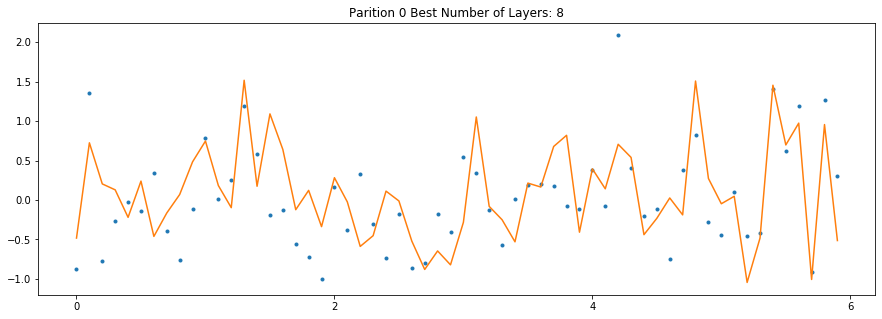

<Figure size 432x288 with 0 Axes>

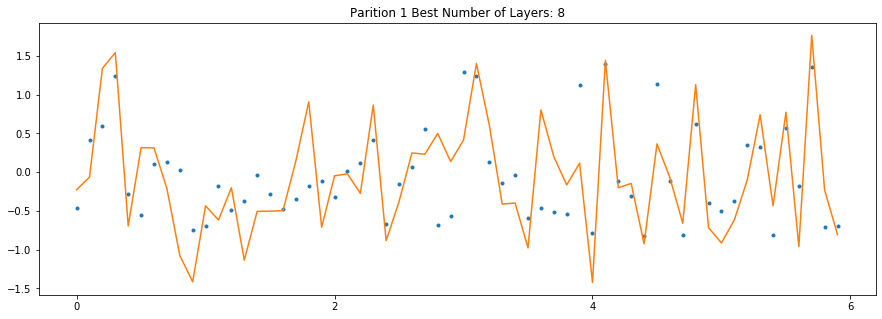

<Figure size 432x288 with 0 Axes>

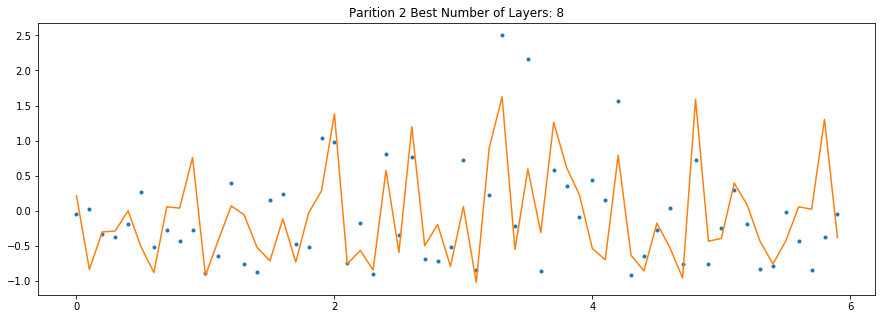

<Figure size 432x288 with 0 Axes>

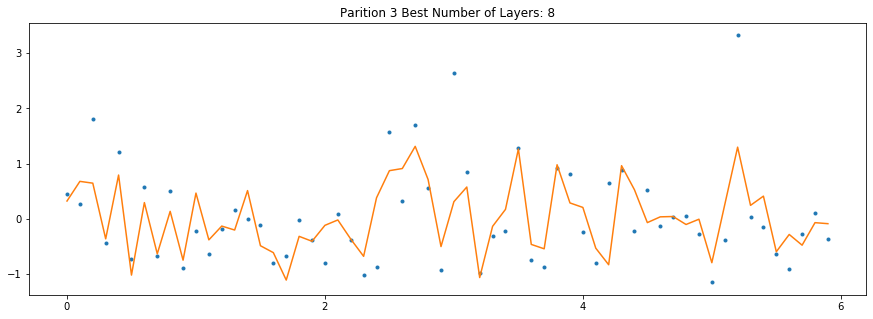

<Figure size 432x288 with 0 Axes>

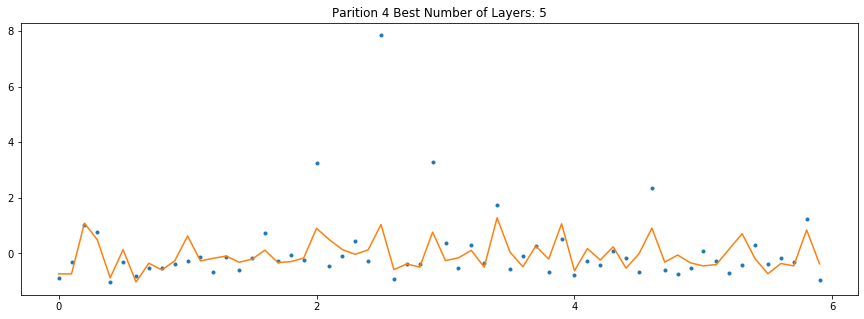

Best Layer Value: 8


In [131]:
dfTrain, dfTest = train_test_split(df, test_size=0.30)
layer = kFoldNonLinearReg(dfTrain, folds=5, numLayers=[5,6,8,10])

Splitting the data into features and target for training and testing dataset.

In [132]:
train_X = dfTrain.iloc[:,1:].to_numpy()
train_y = dfTrain.iloc[:,:1].to_numpy()
test_X = dfTest.iloc[:,1:].to_numpy()
test_y = dfTest.iloc[:,:1].to_numpy()

Now the best number of hidden layers found from the K-Fold technique is used for training the model and calculating the accuracy by applying it to the test dataset.

In [133]:
num_features = train_X.shape[1]
num_output = train_y.shape[1]
hidden_units = layer
nn = NeuralNet([num_features,hidden_units,num_output])
nn.train(train_X,train_y, wprecision=1e-20, fprecision=1e-2) 
pred_y = nn.use(test_X)

Below is the calculated Mean Squared Error and Accuracy of the model.

In [134]:
print(f'Mean squared error: {mean_squared_error(test_y, pred_y)}')
print(f'Accuracy: {100 - np.mean(np.abs(test_y - pred_y)) * 100}')

Mean squared error: 0.6431672786999256
Accuracy: 49.56766063639937


Below is the visualization of the nonlinear regression model where the predicted nonlinear regression line is plotted on the test data.

<Figure size 432x288 with 0 Axes>

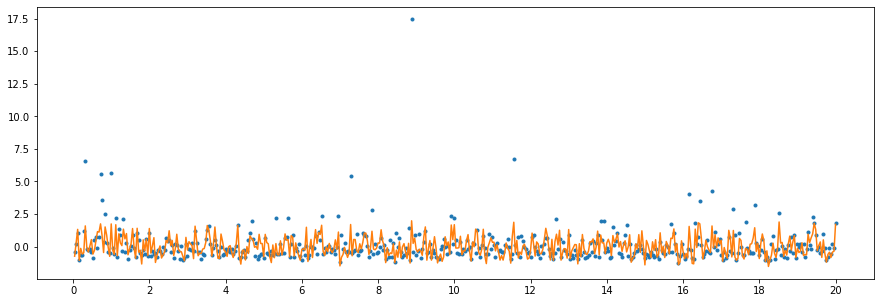

In [135]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(test_y[:500], '.')
plt.xticks(range(-1, 500, 50), range(0, 30, 2))
plt.plot(pred_y[:500])
plt.show()

Below is the visualization for the predicted data points and actual data points.

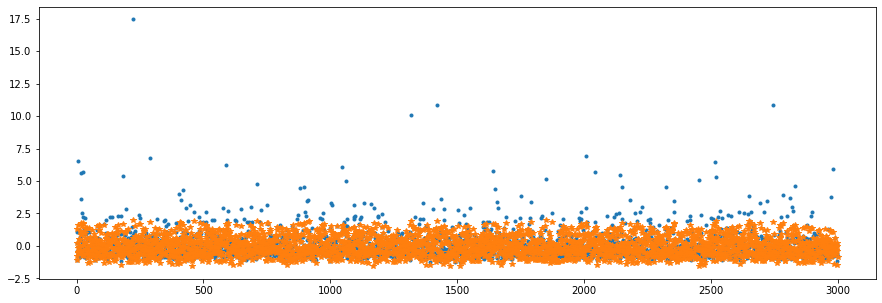

In [136]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(test_y, '.')
plt.plot(pred_y, '*')
plt.show()

# Non Linear Logistic Regression Experiment

### Training on Dummy Data
Below is the application of the nonlinear logistic regression applied on the dummy data. 

In [137]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

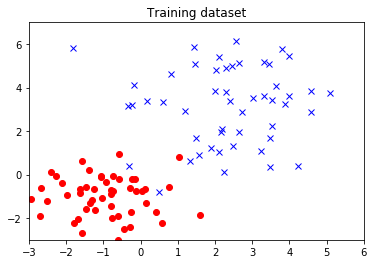

In [138]:
#  Train Data
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("Training dataset")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

Text(0.5, 1.0, 'Test dataset')

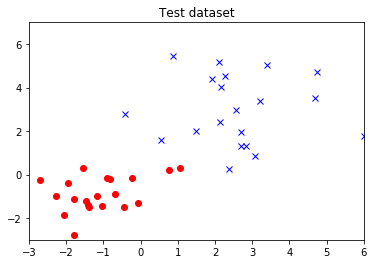

In [139]:
#  Test Data
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds

plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("Test dataset")

In [140]:
# Apply Nonlinear Logistic Regression
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain, wprecision=1e-20, fprecision=1e-2)
classes, Y = clsf.use(Xtest)

Accuracy:  50.0 %


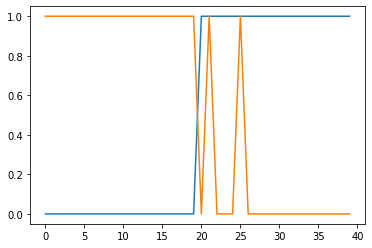

In [141]:
plt.plot(Ttest)
plt.plot(classes)
print("Accuracy: ", 100 - np.mean(np.abs(Ttest - classes)) * 100, "%")

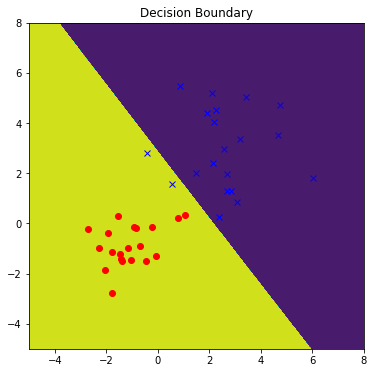

In [142]:
# show the boundary
x = np.linspace(-5, 8, 1000)
y = np.linspace(-5, 8, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

### Training on Bank Marketing Dataset
Splitting the data into training and test dataset and using training data to apply the kFoldNonLinearLogReg function which uses the K-fold cross-validation technique to find the best number of hidden layers for the neural network model.

[0.5648148148148149, 0.5462962962962964, 0.5, 0.5, 0.5, 0.5462962962962964]
[0.5, 0.5392156862745098, 0.5, 0.5, 0.5, 0.5]
[0.5454545454545454, 0.5, 0.5, 0.5, 0.45454545454545453, 0.5909090909090909]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.54]
[0.5, 0.5, 0.41000000000000003, 0.42000000000000004, 0.4, 0.6]


<Figure size 432x288 with 0 Axes>

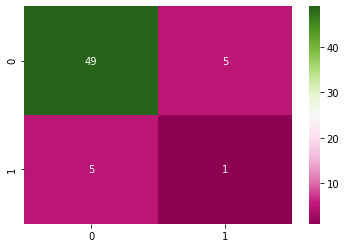

<Figure size 432x288 with 0 Axes>

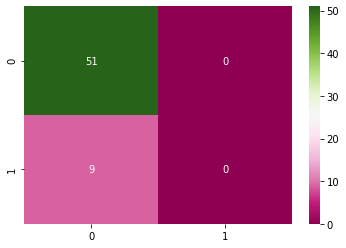

<Figure size 432x288 with 0 Axes>

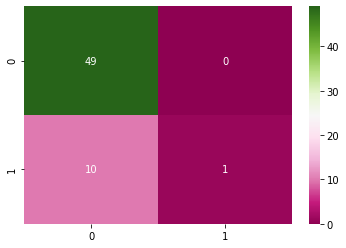

<Figure size 432x288 with 0 Axes>

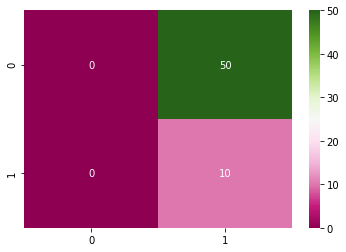

<Figure size 432x288 with 0 Axes>

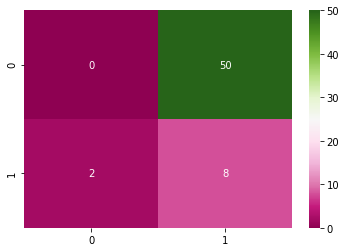

Best Layer Value: 12


In [143]:
data = data.sample(frac=1).reset_index(drop=True)
dfTrain, dfTest = train_test_split(data, test_size=0.30)
layer = kFoldNonLinearLogReg(dfTrain, folds=5, numLayers=[2,3,4,6,10,12])

Splitting the data into features and the target for training and testing dataset.

In [144]:
train_X = dfTrain.iloc[:,:-1].to_numpy()
test_X = dfTest.iloc[:,:-1].to_numpy()
train_y = dfTrain.iloc[:,-1:].to_numpy()
test_y = dfTest.iloc[:,-1:].to_numpy()

Now the best number of hidden layers found from the K-Fold technique is used for training the model and calculating the accuracy by applying it to the test dataset.

In [145]:
num_features = train_X.shape[1]
hidden_units = layer
nn_log = NeuralNetLogReg([num_features, hidden_units, 2])
nn_log.train(train_X,train_y)
label, prob = nn_log.use(test_X)

Visualization of the confusion matrix for the predicted data.

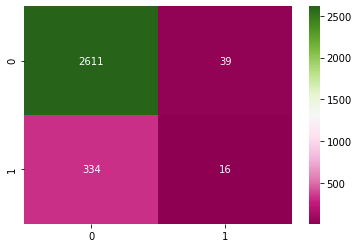

In [146]:
cf = confusion_matrix(test_y,label)
sns.heatmap(cf, annot=True, cmap="PiYG", fmt='g')

In [147]:
print(f'Model Accuracy: {accuracy(cf)} %')

Model Accuracy: 88.0 %


Visualizing the ROC and AUC curve for the Nonlinear Logistic Regression model.

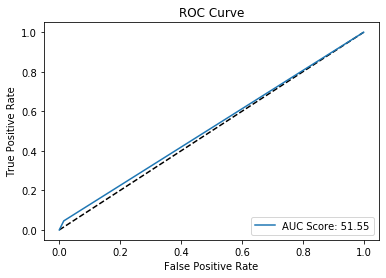

In [148]:
fpr, tpr, _ = roc_curve(test_y, label)
plt.plot([0, 1], [0, 1], 'k--')
auc = roc_auc_score(test_y, label)
plt.plot(fpr, tpr, label=f"AUC Score: {np.round(auc*100,2)}")
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# IV - Results

In the experiment section, the results of the different number of hidden layers for the neural network model were tested for both nonlinear regression and nonlinear logistic regression. Based on the visualizations, it seems that the number of hidden layers significantly affects the performance and prediction of the model.

For the nonlinear regression model, the K-means Cross Validation method was tested with a different number of internal layers for the neural network. Based on the visualizations, it can be seen that the neural network with 5 internal layers works the best. The root means square error (RMSE) which was recorded to be the lowest in the k-fold cross-validation was selected for testing. Based on the parameter generated from the k-fold cross-validation, the nonlinear regression model was tested to gain the model accuracy. Several different values for hidden layers were tested to find out the best performing model. While testing out different values for hidden layers, I found that increasing hidden layers to significantly high number was not causing much improvement in the performance. The number of hidden layers best suited for the model was below 20.

The K-means Cross Validation method was also applied to the nonlinear logistic regression model where several different values for internal layers for the neural network were tested. Based on the visualizations captured from each fold, it can be seen that the AUC curve for the neural network with 8 internal layers worked better as compared to the other values which were tested. Based on the parameter which was retrieved from the k-means cross-validation, the model was applied to the test data to gain the best accuracy and performance. While testing the different values for the hidden layers, I found that the model was not able to classifying the data accurately when the number of hidden layers were increased. I tried several values for the hidden layers and found that the model performs better with less number of hidden layers.

# Conclusions

In this assignment, I have learned to implement the K-means Cross-Validation Algorithm to evaluate the skill of the model on the new data. Learning how to implement the K-means algorithm was interesting because using this algorithm helped me to find the best value for the number of internal layers for the neural network models. The implementation and application of the non-linear regression and non-linear logistic regression helped me to get a better understanding of the inner workings of the neural network models.

The implementation of the k-means cross-validation was very straightforward and helpful to gain the best working parameters for testing the model. With the help of this function, I was able to tackle the problem of overfitting while training the models.
The nonlinear regression class was challenging to understand because there were several different functions in the class which were quite difficult to understand. The nonlinear logistic regression model also took a while for me to understand and implement.

Overall this assignment was very helpful for me to understand how nonlinear regression and nonlinear logistic regression is implemented and applied to the dataset for predicting and classifying the data using the neural network models.

# References

DiGangi, E., &amp; Hefner, J. (2012, October 09). *Ancestry Estimation.* Retrieved from https://www.sciencedirect.com/science/article/pii/B9780123851895000054

Geron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build <br>Intelligent Systems* (2nd ed.). Sebastopol, CA: O'Reilly Media, Incorporated.

harlfoxem (2016). *House Sales in King County, USA* (Version 1) [Data file]. Retrieved from https://www.kaggle.com/harlfoxem/housesalesprediction

Sharma, Natasha (2018). *Ways to Detect and Remove the Outliers.* Retrieved from https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

S. Moro, P. Cortez, and P. Rita (2014). *Bank Marketing Data Set* (Version 1) [Data file]. Retrieved from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>

# More Analysis

Testing various **activation functions** in this section. Using the best neural network structure to explore 3 different activation functions using, cross validation to discover the best model (with activation function).

In order to test various activation functions, I have used NeuralNet Class to apply the different activation functions on the regression data which predicts the house prices in Kings county. Below are 3 activation functions which I have created:

- tanhActivation - Uses Hyperbolic Tangent Activation Function 
- sigmoidActivation - Uses Logistic Sigmoid Activation Function
- reluActivation -  Uses Rectified Linear Activation Function (ReLU)

In [149]:
# Neural Network referenced NN code by Chuck Anderson in R and C++ by Jake Lee (lemin)

import numpy as np
import matplotlib.pyplot as plt
from grad import scg, steepest
from copy import copy
from util import Standardizer

class NeuralNetActv:
    def __init__(self, nunits, activation):
        self._nLayers = len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc
        self._weights = np.random.uniform(-0.1, 0.1, lenweights)
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1]
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end
        self.stdX = None
        self.stdT = None
        self.stdTarget = True
        self.activFunc = activation

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None, s=None):
        if m is None:
            m = np.mean(X)
        if s is None:
            s = 2  # np.std(X)
        r = 1. / (np.sqrt(2*np.pi) * s)
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def tanhActivation(self, X):
        return np.tanh(X)
    
    def sigmoidActivation(self, X):
        return 1 / (1 + np.exp(-X))
    
    def reluActivation(self, X):
        return np.maximum(X, 0)

    def forward(self, X):
        t = X
        Z = []
        for i in range(self._nLayers):
            Z.append(t)
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                if self.activFunc == "sigmoid":
                    t = self.sigmoidActivation(np.dot(self.add_ones(t), self._W[i]))
                elif self.activFunc == "relu":
                    t = self.reluActivation(np.dot(self.add_ones(t), self._W[i]))
                else:
                    t = self.tanhActivation(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)

    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i == 0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])), self._W[i][1:, ]))
            dws.insert(0, (-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y

    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)
        # parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)
        # optimization
        optim = params.pop('optim', 'scg')
        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)

        def gradientf(weights):
            self.unpack(weights)
            Y, Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)

        def optimtargetf(weights):
            """ optimization target function : MSE """
            self.unpack(weights)
            # self._weights[:] = weights[:]  # unpack
            Y, _ = self.forward(Xs)
            Wnb = np.array([])
            for i in range(self._nLayers):
                if len(Wnb) == 0:
                    Wnb = self._W[i][1:, ].reshape(self._W[i].size-self._W[i][0, ].size, 1)
                else:
                    Wnb = np.vstack((Wnb, self._W[i][1:, ].reshape(self._W[i].size-self._W[i][0, ].size, 1)))
            wpenalty = _lambda * np.dot(Wnb.flat, Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                         wPrecision=wprecision, fPrecision=fprecision,
                         nIterations=niter,
                         wtracep=wtracep, ftracep=ftracep,
                         verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                              nIterations=niter,
                              xPrecision=wprecision, fPrecision=fprecision,
                              xtracep=wtracep, ftracep=ftracep)
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

The kFoldNonLinearActv function is implemented to apply k-fold cross validation technique on the regression data to find the best value for the number of hidden layers and best performing activation function. After the CV is applied, the best performing parameters will be then returned to apply and test the model on the test data. 

In [150]:
import nn
def kFoldNonLinearActv(df, folds, numLayers, activation):
    res = []
    res_arr = []
    testErrs = []
    train, test = train_test_split(df[:1000], test_size=0.30)
    trainArr_x, trainArr_y = split_data_nonlinear_reg(train, folds=5)
    testArr_x, testArr_y = split_data_nonlinear_reg(test, folds=5)

    for partition in range(folds):
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        parition_arr = []
        for p in range(len(numLayers)):
            num_features = Xtrain.shape[1]
            num_output = ytrain.shape[1]
            neuralnet = NeuralNet([num_features, numLayers[p], num_output])
            neuralnet.train(Xtrain, ytrain, wprecision=1e-20, fprecision=1e-2)
            pred = neuralnet.use(Xtest)
            rmse_score = mean_squared_error(ytest, pred)
            parition_arr.append(rmse_score)
        print(parition_arr)
        res.append(parition_arr)

    for partition in range(folds):
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        min_value = min(res[partition])
        min_pos = np.where(res[partition] == min(res[partition]))[0][0]
        res_arr.append([min_pos, min_value])

        num_features = trainArr_x[partition].shape[1]
        num_output = trainArr_y[partition].shape[1]
        neuralnet = NeuralNet([num_features, numLayers[min_pos], num_output])
        neuralnet.train(trainArr_x[partition], trainArr_y[partition], wprecision=1e-20, fprecision=1e-2)
        pred = neuralnet.use(testArr_x[partition])
        rmse_score = mean_squared_error(ytest, pred)

    testErrs = [res[0] for res in res_arr]
    best_num_layer = max(set(testErrs), key=testErrs.count)
    hiddenLayers = numLayers[best_num_layer]
    print(f"Best worked value for Number of Hidden layers: {hiddenLayers}")
    
    res.clear()
    res_arr.clear()
    testErrs.clear()

    for partition in range(folds):
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        parition_arr = []
        for p in range(len(activation)):
            num_features = Xtrain.shape[1]
            num_output = ytrain.shape[1]
            neuralnet = NeuralNetActv([num_features, hiddenLayers, num_output], activation[p])
            neuralnet.train(Xtrain, ytrain, wprecision=1e-20, fprecision=1e-2)
            pred = neuralnet.use(Xtest)
            rmse_score = mean_squared_error(ytest, pred)
            parition_arr.append(rmse_score)
        res.append(parition_arr)

    for partition in range(folds):
        Xtrain = trainArr_x[partition]
        ytrain = trainArr_y[partition]
        Xtest = testArr_x[partition]
        ytest = testArr_y[partition]
        min_value = min(res[partition])
        min_pos = np.where(res[partition] == min(res[partition]))[0][0]
        res_arr.append([min_pos, min_value])

        num_features = trainArr_x[partition].shape[1]
        num_output = trainArr_y[partition].shape[1]
        neuralnet = NeuralNetActv([num_features, hiddenLayers, num_output], activation[min_pos])
        neuralnet.train(trainArr_x[partition], trainArr_y[partition], wprecision=1e-20, fprecision=1e-2)
        pred = neuralnet.use(testArr_x[partition])
        rmse_score = mean_squared_error(ytest, pred)
        plt.clf()
        plt.subplots(figsize=(15,5))
        plt.title(f'Parition {partition} Best Worked Activation Function: {activation[min_pos]}')
        plt.plot(ytest, '.')
        plt.xticks(range(0, 101, 20), range(0, 11, 2))
        plt.plot(pred)
        plt.show()

    testErrs = [res[0] for res in res_arr]
    best_num_layer = max(set(testErrs), key=testErrs.count)
    print(f"Best Activation Function: {activation[best_num_layer]}")
    return hiddenLayers, activation[best_num_layer]

[1.0144949159176548, 0.579648516736341, 0.6343378469676946, 0.5997189809811463, 0.556795317624486]
[0.3716124971584156, 0.22521830672733711, 0.22608254176502418, 0.23791806103149954, 0.22940945426492018]
[0.5103521441103233, 0.3171924063657251, 0.33105765120279673, 0.3200953468336382, 0.3103403699629901]
[0.6673970554997516, 0.35347827462964115, 0.3797484580788228, 0.3831246702218702, 0.4314115737022121]
[0.9032220792067036, 0.4770910929327677, 0.4965898187844478, 0.469332028228725, 0.4725247224331088]
Best worked value for Number of Hidden layers: 5


<Figure size 432x288 with 0 Axes>

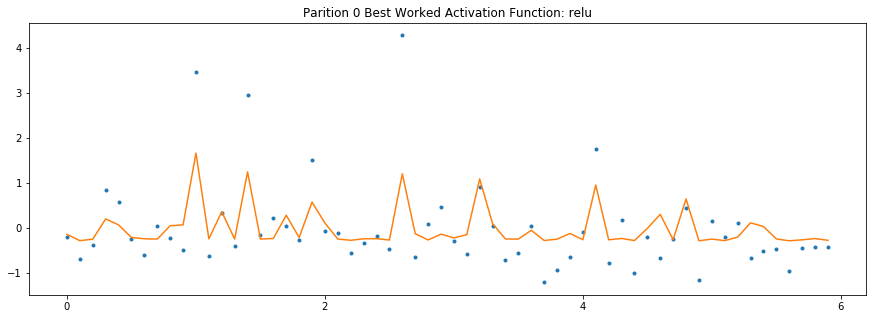

<Figure size 432x288 with 0 Axes>

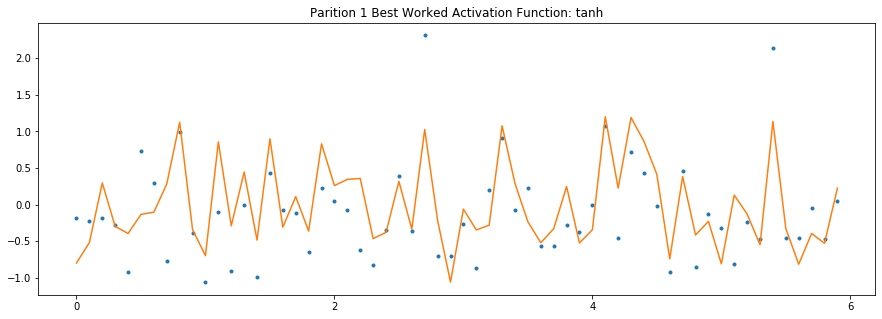

<Figure size 432x288 with 0 Axes>

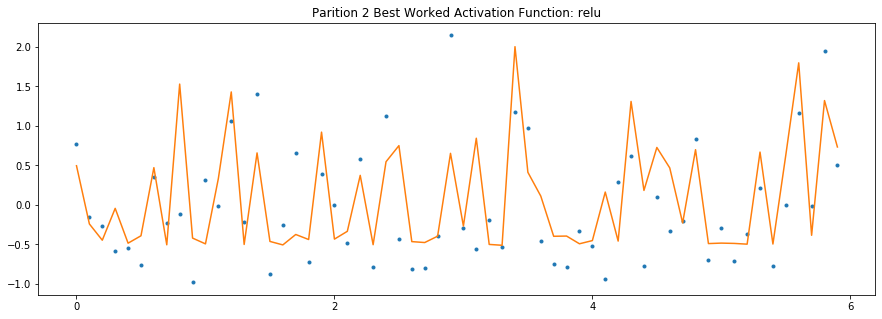

<Figure size 432x288 with 0 Axes>

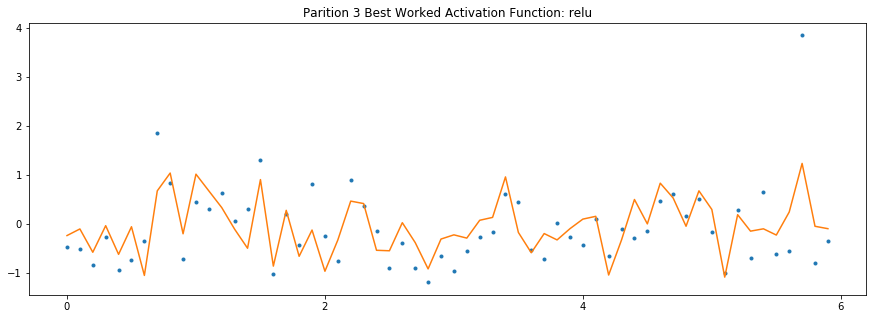

<Figure size 432x288 with 0 Axes>

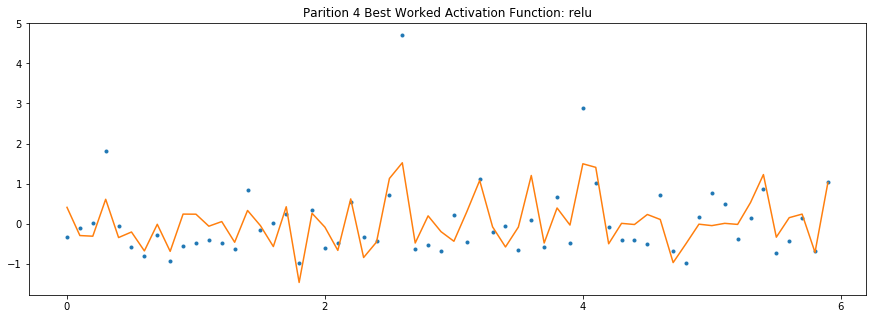

Best Activation Function: relu


In [151]:
dfTrain, dfTest = train_test_split(df, test_size=0.30)
hidden_units, activation = kFoldNonLinearActv(dfTrain, 
                                              folds=5, 
                                              numLayers=[2, 5, 10, 15, 20], 
                                              activation=["tanh", "sigmoid", "relu"])

In [152]:
dfTrain, dfTest = train_test_split(df, test_size=0.20)
train_X = dfTrain.iloc[:,1:].to_numpy()
train_y = dfTrain.iloc[:,:1].to_numpy()
test_X = dfTest.iloc[:,1:].to_numpy()
test_y = dfTest.iloc[:,:1].to_numpy()

In [153]:
num_features = train_X.shape[1]
num_output = train_y.shape[1]
nn = NeuralNetActv([num_features,hidden_units,num_output], activation)
nn.train(train_X,train_y, wprecision=1e-20, fprecision=1e-2) 
pred_y = nn.use(test_X)

Below is the Mean Square Error and Accuracy of the model:

In [154]:
print(f'Mean squared error: {mean_squared_error(test_y, pred_y)}')
print(f'Accuracy: {100 - np.mean(np.abs(test_y - pred_y)) * 100}')

Mean squared error: 0.5700356064699156
Accuracy: 52.159926274267484


<Figure size 432x288 with 0 Axes>

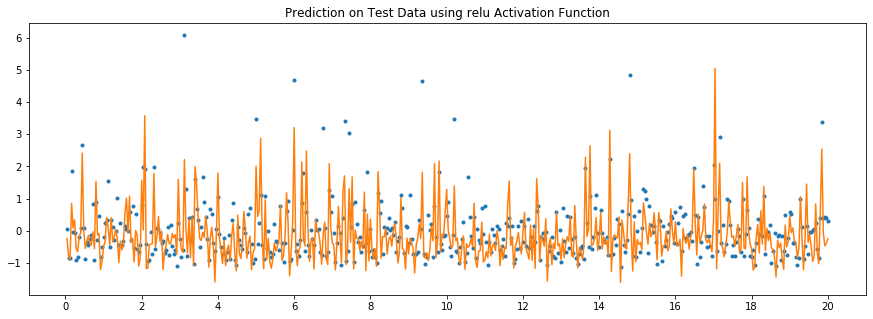

In [155]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(test_y[:500], '.')
plt.xticks(range(-1, 500, 50), range(0, 30, 2))
plt.plot(pred_y[:500])
plt.title(f"Prediction on Test Data using {activation} Activation Function")
plt.show()

Below is the visualization of predicted values vs test values:

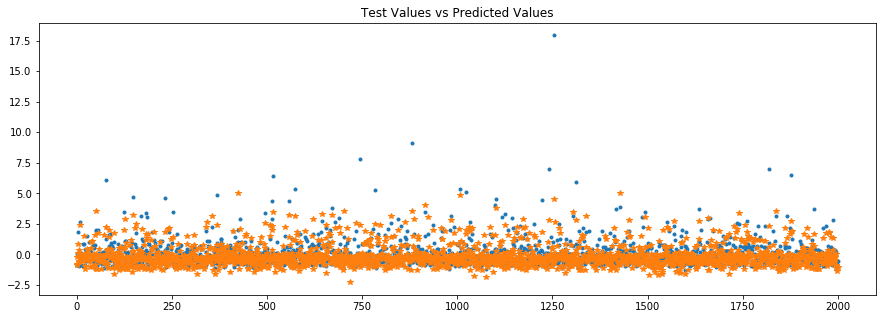

In [156]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(test_y, '.')
plt.plot(pred_y, '*')
plt.title("Test Values vs Predicted Values")
plt.show()